## EDA of combined data.

In [47]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.max_columns",50)
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [48]:
#readings the datasets
cust_add = pd.read_csv('CustomerAddress.csv')
cust_demo = pd.read_csv('CustomerDemographic.csv')
newcust_list = pd.read_csv('NewCustomerList_cleaned.csv')
transactions = pd.read_csv('transactions_cleaned_csv')

In [49]:
cust_add.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [50]:
cust_demo.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,71,80
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,44,50


In [51]:
print(cust_add.shape)
cust_demo.shape

(3999, 6)


(3999, 13)

* Joining the `CustomerAddress` and `CustomerDemographics` using **customer_id**.

In [52]:
cust_data = pd.merge(cust_demo, cust_add, how='inner', on='customer_id')
cust_data.head(2)

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,71,80,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,44,50,6 Meadow Vale Court,2153,NSW,Australia,10


In [53]:
cust_data.shape

(3995, 18)

In [54]:
newcust_list.head(2)

,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_group
0,Chickie,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,67,70
1,Morly,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,54,60


* Since the NewCustomerList lacks a customer ID column, concatenating it with the old customer data won't work because the columns aren't identical.
* Therefore, we'll proceed with the RFM analysis using the `cust_data` table and transactions.
* After completing the analysis, we can compare the old and new customer datasets

In [55]:
# merging transaction and cust_data tables
cmp_data = pd.merge(transactions, cust_data, left_on='customer_id', right_on='customer_id', how='inner')
cmp_data.shape

(19959, 31)

In [56]:
cmp_data.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_group,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87,Kristos,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01,448.68,Kristos,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,1970-01-01,179.44,Kristos,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70,984 Hoepker Court,3064,VIC,Australia,6


In [123]:
cmp_data.to_csv('cust_trans_combined.csv',index=False)

* We now have all the data combined into a single table called cmp_data, which will be used for EDA and then for RFM analysis.

### EDA and Hypothesis Testing

#### 1. Does cost of the product has an impact on mode of order(online/offline)?
So to check this, `online_order` and `standard_cost` are plotted on barplot.

In [104]:
online_order_std_cost = cmp_data.groupby('online_order').agg({'standard_cost':sum}).reset_index()
online_order_std_cost.head()

,online_order,standard_cost
0,0.0,5511791.08
1,1.0,5589963.43


<AxesSubplot:xlabel='online_order', ylabel='standard_cost'>

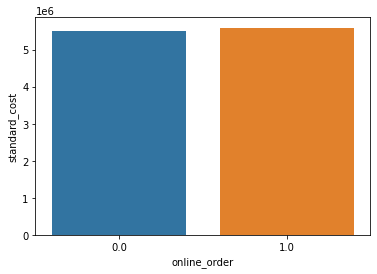

In [105]:
sns.barplot(online_order_std_cost['online_order'],online_order_std_cost['standard_cost'])

* 1 being ordered online, and 0 is not, both the bars more or less have same height.
* so the cost of an item doesnt have an impact on mode of ordering.

#### 2. Does wealth segment has an affect on num of purchases ?
So to check this, `wealth_segment` and `transaction_id` are plotted on barplot.

<AxesSubplot:xlabel='wealth_segment', ylabel='transaction_id'>

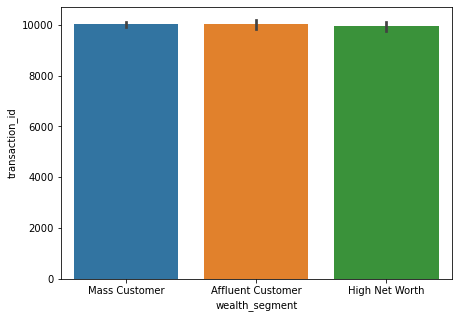

In [59]:
plt.figure(figsize=(7,5))
sns.barplot(x=cmp_data['wealth_segment'],y=cmp_data['transaction_id'])

* So the num of transactions are more or less same for all the customer segments.

### New customer vs old customer age distribution

Text(0.5, 1.0, 'Old customers')

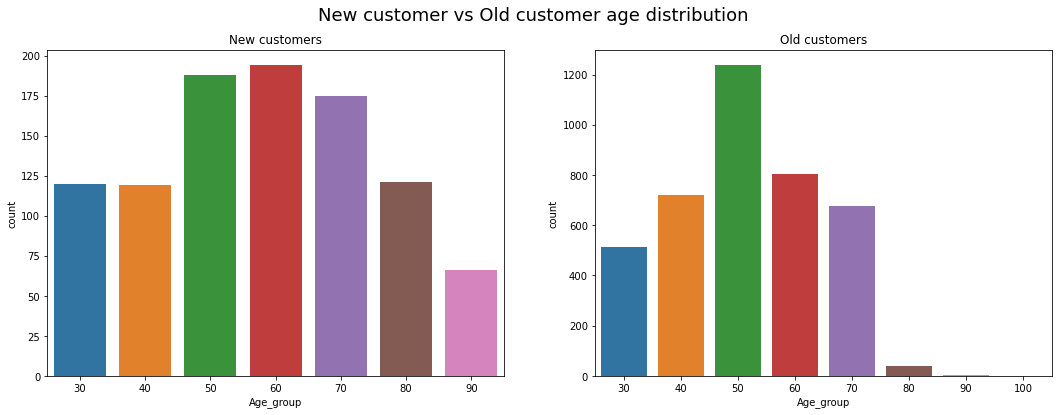

In [69]:
plt.figure(figsize=(18,6))
plt.suptitle("New customer vs Old customer age distribution",fontsize=18)

plt.subplot(1,2,1)
sns.countplot(newcust_list['Age_group'])
plt.title("New customers")

plt.subplot(1,2,2)
sns.countplot(cust_data['Age_group'])
plt.title("Old customers")

* Most New and Old Customers are aged between 40 and 49, with the least represented age groups being those under 20 and those 80 and above in both datasets. 
* Among New Customers, the most populated age brackets are 20-29 and 60-69, while the majority of Old Customers fall within the 50-69 age range.

### Bike related purchases over last 3 years by gender

In [78]:
cust_bike_purchase_gender = cust_data.groupby('gender').agg({'past_3_years_bike_related_purchases':sum}).reset_index()
cust_bike_purchase_gender.head()

,gender,past_3_years_bike_related_purchases
0,Female,98231
1,Male,93379
2,Unidentified,3659


<AxesSubplot:xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

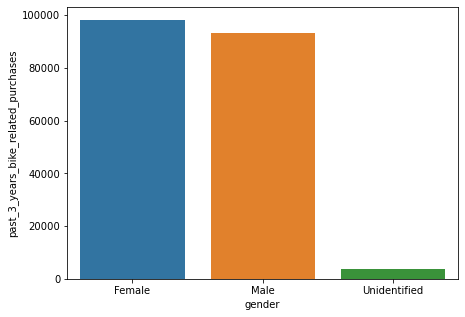

In [84]:
plt.figure(figsize=(7,5))
sns.barplot(cust_bike_purchase_gender['gender'],cust_bike_purchase_gender['past_3_years_bike_related_purchases'])

* So females have bought more num of bikes than males in last three years.

### Job industry customer distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Property'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'Telecommunications'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Argiculture')])

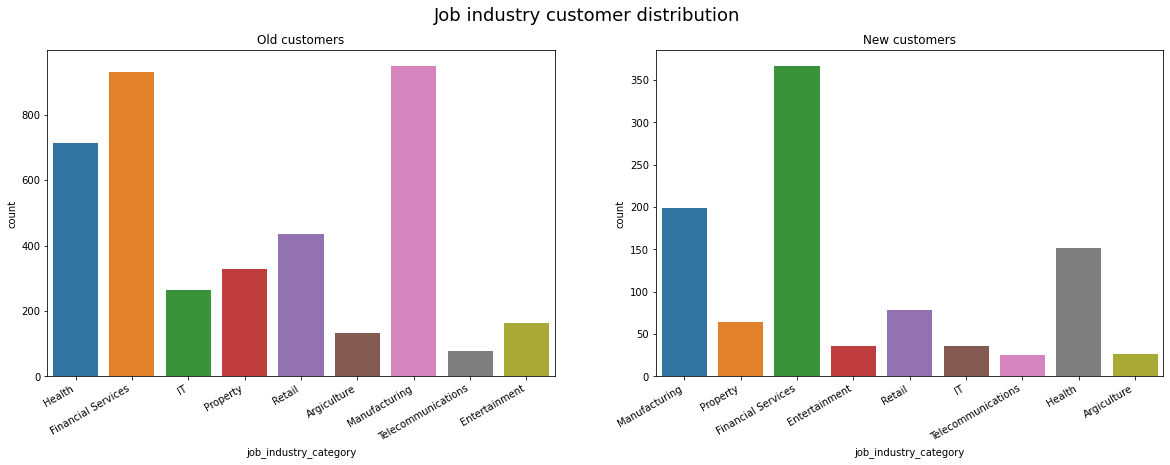

In [101]:
plt.figure(figsize=(20,6))
plt.suptitle("Job industry customer distribution",fontsize=18)

plt.subplot(1,2,1)
sns.countplot(cust_data['job_industry_category'])
plt.title("Old customers")
plt.xticks(rotation=30, ha='right')

plt.subplot(1,2,2)
sns.countplot(newcust_list['job_industry_category'])
plt.title("New customers")
plt.xticks(rotation=30, ha='right')


* Among New Customers, the highest sales are generated by those working in the Manufacturing and Financial Services sectors. 
* The smallest contributions come from the Agriculture and Telecom sectors, with Telecom accounting for just 3% of sales. A similar trend is observed among Old Customers.

### Wealth segmentation by age group

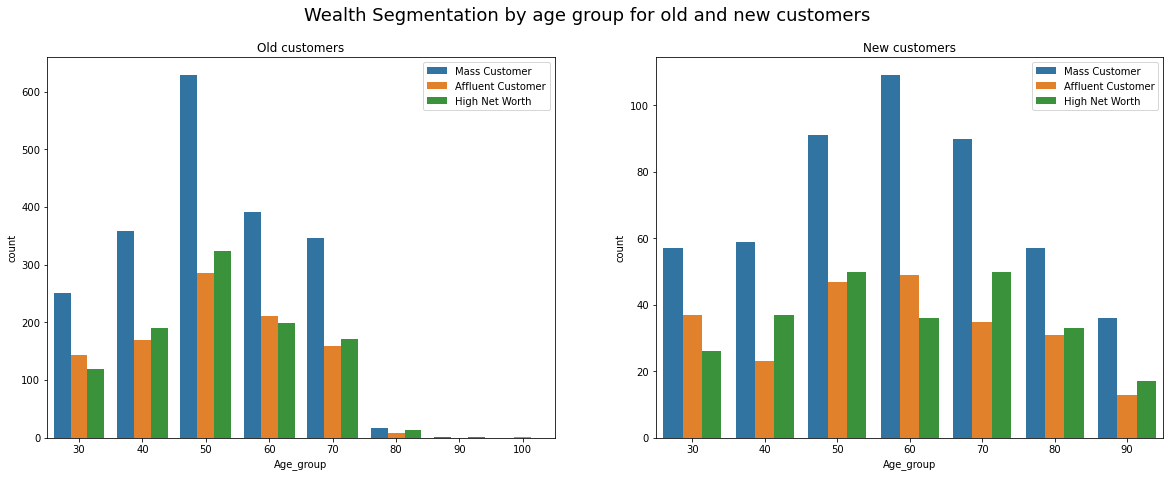

In [119]:
plt.figure(figsize=(20,7))
plt.suptitle("Wealth Segmentation by age group for old and new customers",fontsize=18)

plt.subplot(1,2,1)
sns.countplot(cust_data['Age_group'],hue=cust_data['wealth_segment'],)
plt.title('Old customers')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
sns.countplot(newcust_list['Age_group'],hue=newcust_list['wealth_segment'])
plt.title('New customers')
plt.legend(loc='upper right')

* In the age group of 50-70 mass customers are more compared to other segments.

### Cars owners across each state

<AxesSubplot:xlabel='state', ylabel='count'>

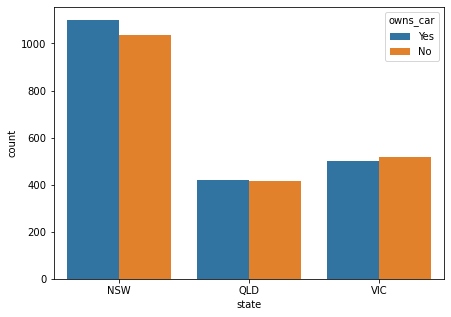

In [122]:
plt.figure(figsize=(7,5))
sns.countplot(cust_data['state'],hue=cust_data['owns_car'])

* NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states.
* In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW.